## Content
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:

Age (numeric)
Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [8]:
df.drop(['Unnamed: 0'],inplace=True, axis=1)

In [14]:
df.shape

(1000, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [19]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [25]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64

Column Sex
AxesSubplot(0.125,0.125;0.775x0.755)


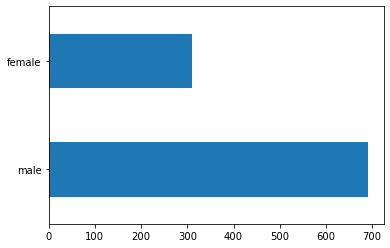

------------------------------
Column Housing
AxesSubplot(0.125,0.125;0.775x0.755)


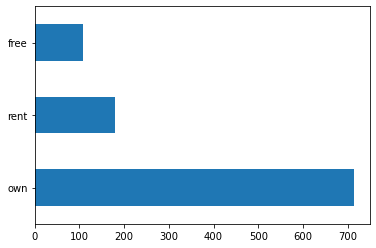

------------------------------
Column Saving accounts
AxesSubplot(0.125,0.125;0.775x0.755)


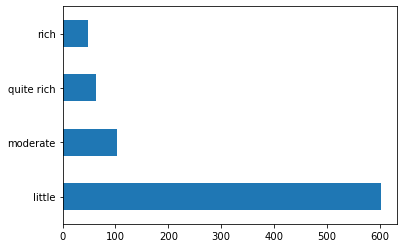

------------------------------
Column Checking account
AxesSubplot(0.125,0.125;0.775x0.755)


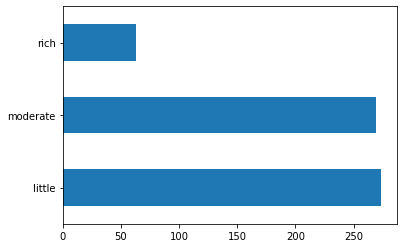

------------------------------
Column Purpose
AxesSubplot(0.125,0.125;0.775x0.755)


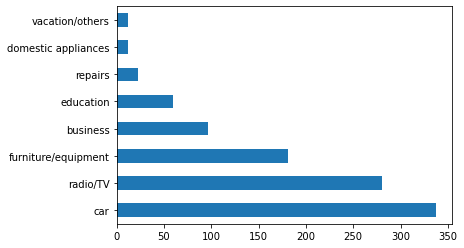

------------------------------


In [64]:
for col in df.columns:
    if df[col].dtype == object:
        print("Column",col)
        print(df[col].value_counts().plot(kind='barh'))
        plt.show();
        print("-"*30)

Column Sex
AxesSubplot(0.125,0.125;0.775x0.755)


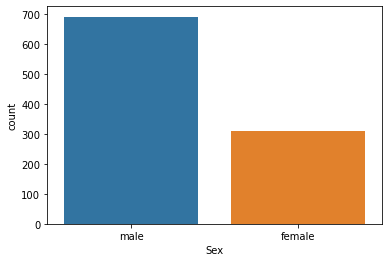

------------------------------
Column Housing
AxesSubplot(0.125,0.125;0.775x0.755)


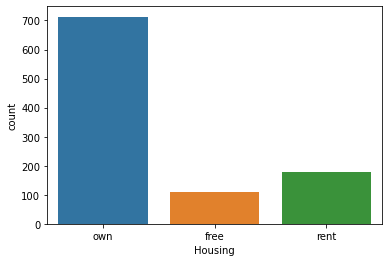

------------------------------
Column Saving accounts
AxesSubplot(0.125,0.125;0.775x0.755)


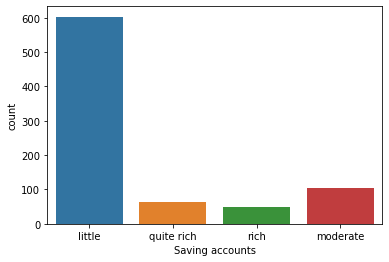

------------------------------
Column Checking account
AxesSubplot(0.125,0.125;0.775x0.755)


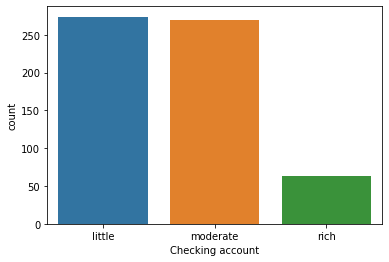

------------------------------
Column Purpose
AxesSubplot(0.125,0.125;0.775x0.755)


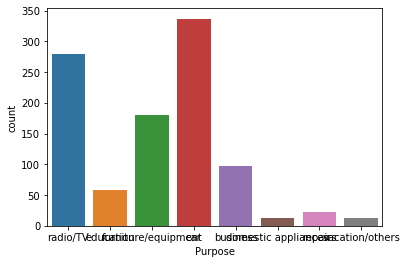

------------------------------


In [70]:
for col in df.columns:
    if df[col].dtype == object:
        print("Column",col)
        print(sns.countplot(data=df, x=col))
        plt.show()
        print("-"*30)

In [40]:
for col in df.select_dtypes(include= object):
    print(f"{col}: {df[col].unique()}")
    print("-"*30)

Sex: ['male' 'female']
------------------------------
Housing: ['own' 'free' 'rent']
------------------------------
Saving accounts: [nan 'little' 'quite rich' 'rich' 'moderate']
------------------------------
Checking account: ['little' 'moderate' nan 'rich']
------------------------------
Purpose: ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
------------------------------


In [41]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [46]:
for col in df.select_dtypes(include= ['int64']):
    print(f"{col}: {df[col].nunique()}")
    print("-"*30)

Age: 53
------------------------------
Job: 4
------------------------------
Credit amount: 921
------------------------------
Duration: 33
------------------------------


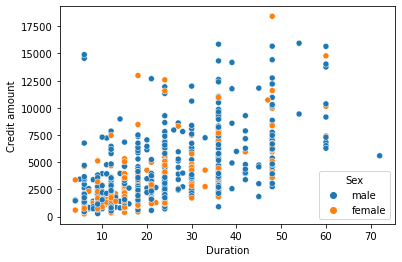

In [58]:
sns.scatterplot(data=df,x='Duration', y= 'Credit amount',hue='Sex');

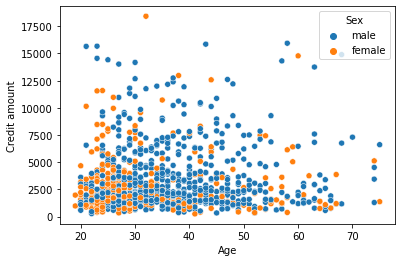

In [59]:
sns.scatterplot(data=df,x='Age', y= 'Credit amount',hue='Sex');

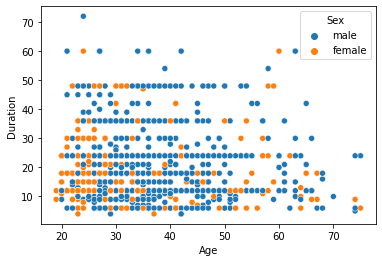

In [60]:
sns.scatterplot(data=df,x='Age', y= 'Duration',hue='Sex');

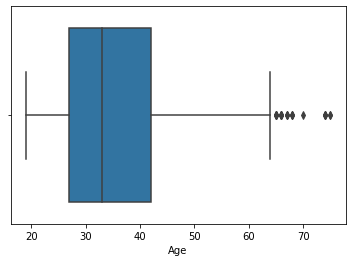

In [74]:
sns.boxplot(data=df, x='Age');

<AxesSubplot:xlabel='Duration'>

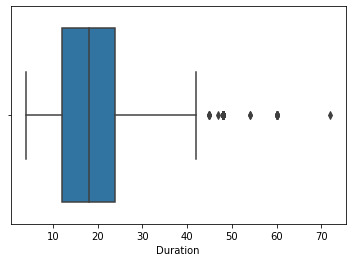

In [81]:
sns.boxplot(data=df, x='Duration')

<AxesSubplot:xlabel='Credit amount', ylabel='Count'>

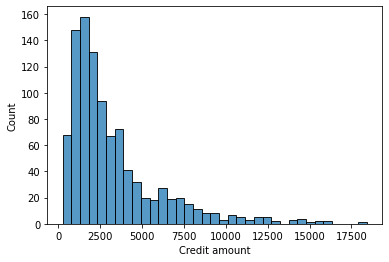

In [80]:
sns.histplot(data=df, x='Credit amount')

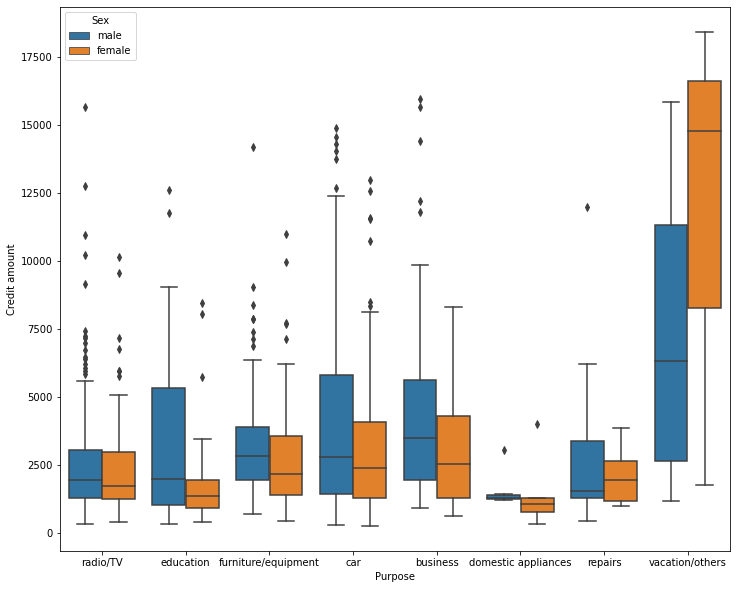

In [90]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x='Purpose',y='Credit amount',hue='Sex')
plt.show()

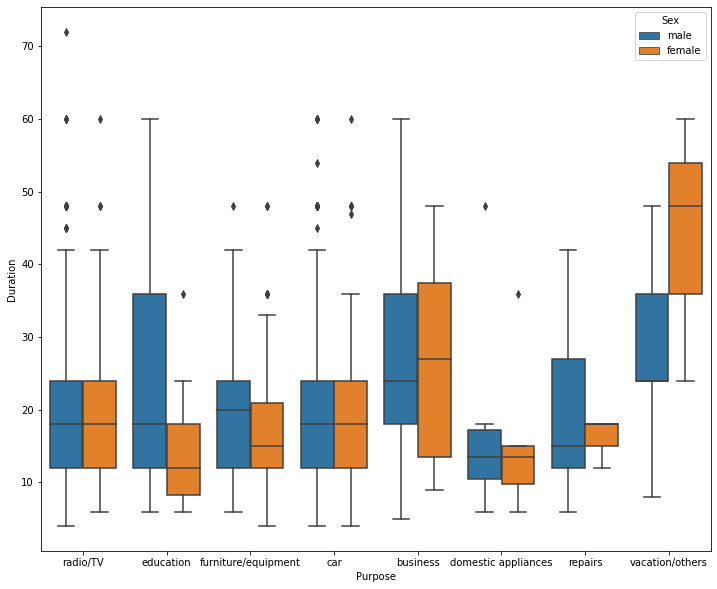

In [91]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x='Purpose',y='Duration',hue='Sex')
plt.show()

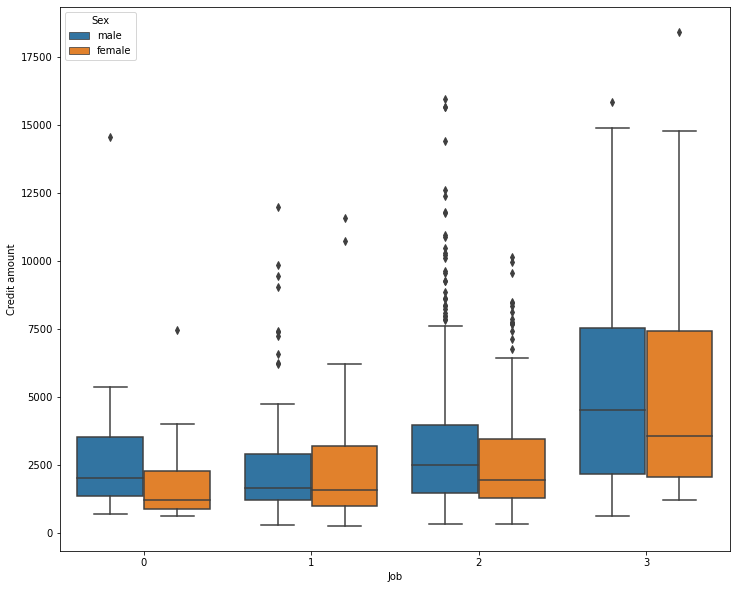

In [92]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x='Job',y='Credit amount',hue='Sex')
plt.show()

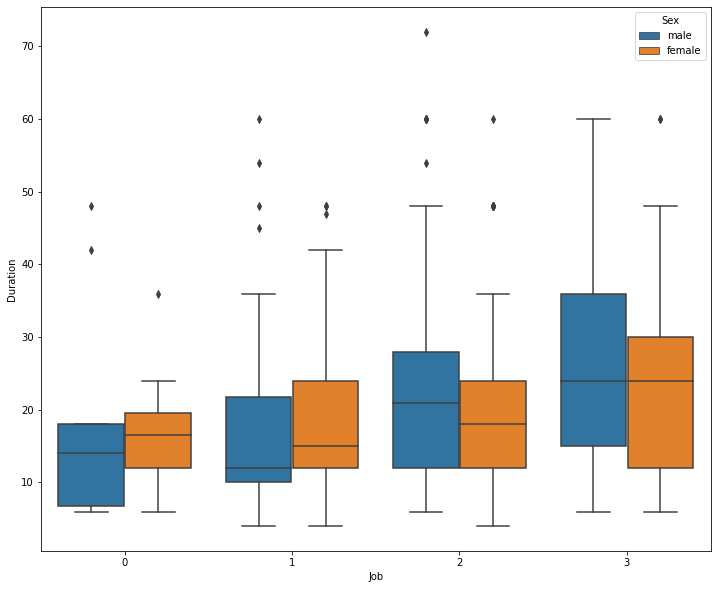

In [98]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df, x='Job',y='Duration',hue='Sex')
plt.show()

In [99]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [109]:
#selcted_cols= ['Age','Credit amount','Duration']
cluster_data = df[['Age','Credit amount','Duration']] #df.loc[:,selcted_cols]
cluster_data

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


<AxesSubplot:xlabel='Credit amount', ylabel='Count'>

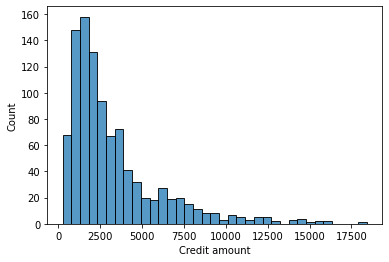

In [110]:
sns.histplot(data=cluster_data,x='Credit amount')

In [111]:
 cluster_log = np.log(cluster_data)

<AxesSubplot:xlabel='Credit amount', ylabel='Count'>

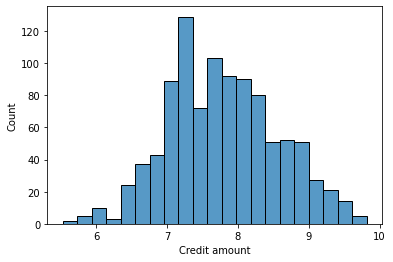

In [112]:
sns.histplot(data=cluster_log,x='Credit amount')

In [114]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

In [115]:
cluster_scaled

array([[ 2.27100592, -0.933901  , -1.86486906],
       [-1.44615223,  1.16304581,  1.7083687 ],
       [ 1.22669602, -0.1815588 , -0.67378981],
       ...,
       [ 0.37810951, -1.4161991 , -0.67378981],
       [-1.29778048, -0.34591111,  1.59746802],
       [-0.76258638,  0.82450846,  1.59746802]])

C:\Users\Sherif\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


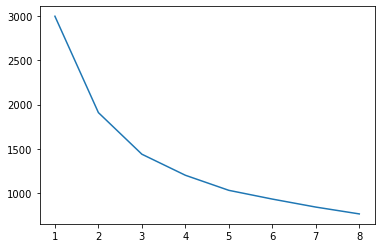

In [116]:
sse = []
c = [1,2,3,4,5,6,7,8]
for i in c:
    kmeans = KMeans(n_clusters=i).fit(cluster_scaled)
    sse.append(kmeans.inertia_)
    
plt.plot(c,sse)

In [118]:
kmeans_sel = KMeans(n_clusters=3).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
labels

,0
0,1
1,2
2,1
3,2
4,2
...,...
995,0
996,2
997,1
998,2


In [119]:
data_final = cluster_data.assign(Cluster = labels)

In [120]:
data_final

,Age,Credit amount,Duration,Cluster
0,67,1169,6,1
1,22,5951,48,2
2,49,2096,12,1
3,45,7882,42,2
4,53,4870,24,2
...,...,...,...,...
995,31,1736,12,0
996,40,3857,30,2
997,38,804,12,1
998,23,1845,45,2


In [121]:
data_final.groupby('Cluster').mean()

,Age,Credit amount,Duration
Cluster,,,
0,27.784153,1732.199454,14.245902
1,48.691120,1979.745174,13.918919
2,34.042667,5665.384000,32.224000
